### Tutorial 11: Fun with MCMC continued!

In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.stats import norm

In [2]:
b = phoebe.load('./data/synthetic/after_initial_sampling.bundle')

/usr/local/lib/python3.9/dist-packages/phoebe/parameters/parameters.py:10236: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._value = np.array(value)


In [3]:
print(b['round_1'])

ParameterSet: 20 parameters
R  wrap_central_values@round_1...: {'ByxjzcQpLyAKDbHYqUyvbnvvOCjoDX': 90.3431416538605}
R  fitted_uniqueids@dyn_rv@rou...: ['JBtLJKojBQcDccDuBHXsRkXRyBLDGM' 'gxSYROyAvbaqfuFRcxkjKrnFZDAyuV'
 'kSzhytUdmWSDmYdPzsVIMSPuxVIFla' 'qEdMVEJqyIlNvRlBrKtxNBKNayHwrG'
 'ByxjzcQpLyAKDbHYqUyvbnvvOCjoDX']
R  fitted_twigs@dyn_rv@round_1...: ['asini@binary@orbit@component' 'q@binary@orbit@component' 'vgamma@system'
 'ecc@binary@orbit@component' 'per0@binary@orbit@component']
R  fitted_units@dyn_rv@round_1...: ['solRad' '' 'km / s' '' 'deg']
   adopt_parameters@dyn_rv@rou...: ['asini@binary@orbit@component', 'q@binary@orbit@component', 'vgamma@system', 'ecc@binary@orbit@component', 'per0@binary@orbit@component']
   adopt_distributions@dyn_rv@...: True
   distributions_convert@round...: mvsamples
   adopt_values@dyn_rv@round_1...: True
R         niters@round_1@solution: 100
R       nwalkers@round_1@solution: 16
R        samples@round_1@solution: [[[8.00450682e+00 6.46755112e-0

`wrap_central_values` and `fitted_uniqueids`: safe to ignore; these are used internally and will likely be abstracted away in a future release. They're used to do faster lookups by the hash and looping over them is more efficient than filtering;

`comments`: human-readable comments about the solution, to be used for reference;

`fitted_twigs`: parameter twigs that were sampled;

`fitted_units`: the units of parameters that were sampled;

`adopt_parameters`: list of sampled parameters for which the solution should be adopted; don't choose a subset unless you have a very good reason;

`adopt_distributions`: should distributions be stored;

`adopt_values`: should face values be stored;

`distributions_convert`: should space-friendly descriptors be used instead of full discrete distributions;

`niters`: number of iterations used to reach the solution;

`nwalkers`: number of walkers used to reach the solution;

`samples`: MCMC samples of the shape (niters, nwalkers, npars);

`failed_samples`: MCMC samples that resulted in lnp=-inf; the return value is a dictionary where keys are failure messages and values are arrays of parameter combinations that caused the failure;

`lnprobabilities`: sampled log-probabilities of the shape (niters, nwalkers);

`acceptance_fractions`: used for convergence evaluation, provided per walker;

`autocorr_times`: autocorrelation times, used for convergence evaluation, provided per parameter;

`burnin`, `thin`, `lnprob_cutoff`: sample modifiers discussed in the previous tutorial;

`progress`: progress meter; useful when farming out to a cluster and checking an intermediate result.

(None, <Figure size 849.6x849.6 with 25 Axes>)

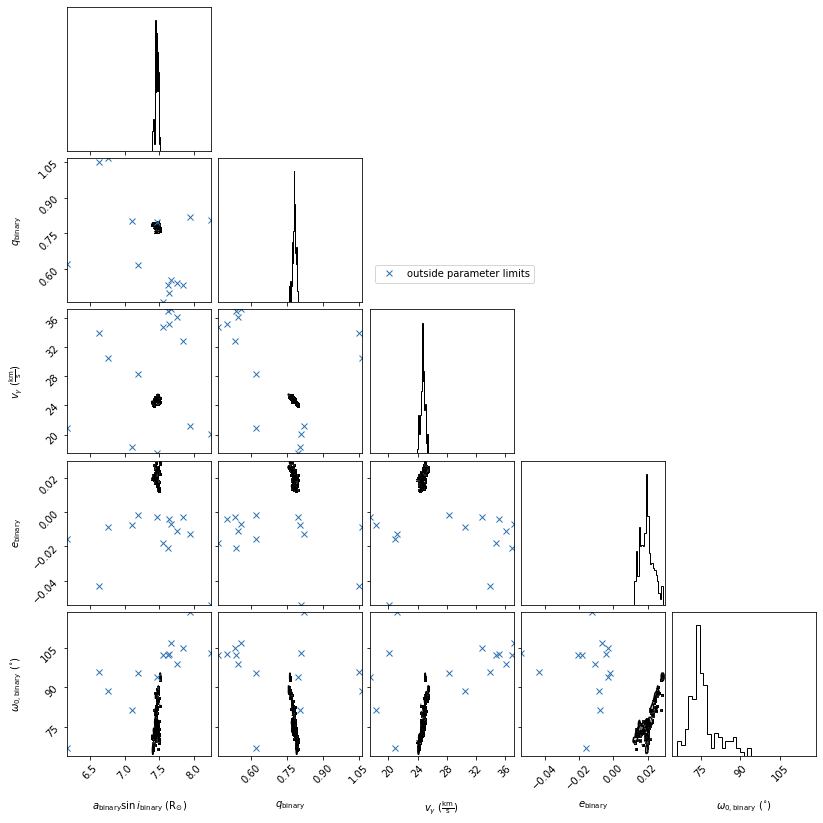

In [4]:
b.plot(solution='round_1', style='failed', burnin=50, show=True)

In [5]:
b.run_compute(compute='dyn_rv', sample_from='round_1', sample_num=25, model='from_posteriors')

100%|██████████| 25/25 [00:00<00:00, 4012.31it/s]

100%|██████████| 25/25 [00:00<00:00, 4175.26it/s]


100%|██████████| 25/25 [00:00<00:00, 4437.29it/s]

100%|██████████| 25/25 [00:00<00:00, 7602.78it/s]


<ParameterSet: 10 parameters | components: primary, secondary>

/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


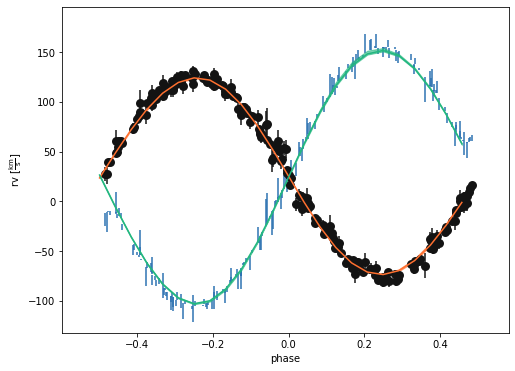

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [6]:
b.plot(model='from_posteriors', x='phase', show=True)

Happy with this? We can adopt the solution by running the adopt_solution() method.

In [7]:
b.distributions

['dist01', 'mvg']

In [8]:
print(b.adopt_solution(solution='round_1', trial_run=True))

ParameterSet: 10 parameters
       asini@dists03@distribution: <distl.mvsamplesslice dimension=0 samples=[[7.61761658e+00 7.44862588e-01 2.61038394e+01 2.56792049e-02
  1.02259455e+02]
 [7.52489228e+00 7.62745325e-01 2.61784415e+01 2.76774059e-02
  9.96596618e+01]
 [7.54474265e+00 7.51856504e-01 2.36106333e+01 2.67391365e-02
  9.64290504e+01]
 ...
 [7.51981846e+00 7.87285389e-01 2.45521669e+01 1.16660703e-02
  7.03045030e+01]
 [7.49865742e+00 7.80657988e-01 2.45254353e+01 1.27257368e-02
  7.04743770e+01]
 [7.47401865e+00 7.78848658e-01 2.47415522e+01 1.65237281e-02
  7.40922291e+01]] weights=None bw_method=None unit=solRad label=asini@binary)>
           q@dists03@distribution: <distl.mvsamplesslice dimension=1 samples=[[7.61761658e+00 7.44862588e-01 2.61038394e+01 2.56792049e-02
  1.02259455e+02]
 [7.52489228e+00 7.62745325e-01 2.61784415e+01 2.76774059e-02
  9.96596618e+01]
 [7.54474265e+00 7.51856504e-01 2.36106333e+01 2.67391365e-02
  9.64290504e+01]
 ...
 [7.51981846e+00 7.8728538

Before we adopt, though, let's have another (quick) coffee break -- let's continue sampling for another 25 iterations.

In [9]:
b.solvers

['rvperiod',
 'lcperiod_bls',
 'lcperiod_ls',
 'rvgeom',
 'ebai_est',
 'lcgeom',
 'nm_solver',
 'mcmc']

In [10]:
b.solutions

['rvperiod_solution',
 'rvperiod_solution_2',
 'lcperiod_bls_solution',
 'lcperiod_ls_solution',
 'rvgeom_solution',
 'ebai_solution',
 'lcgeom_solution',
 'nm_solution',
 'round_1']

Remember the `continue_from` parameter of the solver? That's what we want to set!

In [11]:
print(b['continue_from@mcmc'])

Parameter: continue_from@mcmc@solver
                       Qualifier: continue_from
                     Description: continue the MCMC run from an existing emcee solution.  Chains will be appended to existing chains (so it is safe to overwrite the existing solution).  If None, will start a new run using init_from.
                           Value: None
                         Choices: None, round_1
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [12]:
b['continue_from@mcmc'] = 'round_1'

The `niters` parameter will now correspond to the number of additional iterations; note that we need to specify here that we are setting `niters@solver` and not `niters@solution` (which is read-only anyway).

In [13]:
b['niters@mcmc@solver'] = 25

In [14]:
b.run_solver('mcmc', solution='round_2')

100%|██████████| 25/25 [02:58<00:00,  7.55s/it]WARNING:root:The chain is shorter than 50 times the integrated autocorrelation time for 5 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2;
tau: [11.99924298 14.42244351 12.65206899 16.10673549 16.07571958]
100%|██████████| 25/25 [02:58<00:00,  7.12s/it]


<ParameterSet: 19 parameters | qualifiers: fitted_units, burnin, failed_samples, adopt_values, lnprobabilities, thin, samples, adopt_distributions, progress, autocorr_times, comments, nwalkers, niters, wrap_central_values, distributions_convert, adopt_parameters, lnprob_cutoff, acceptance_fractions, fitted_twigs>

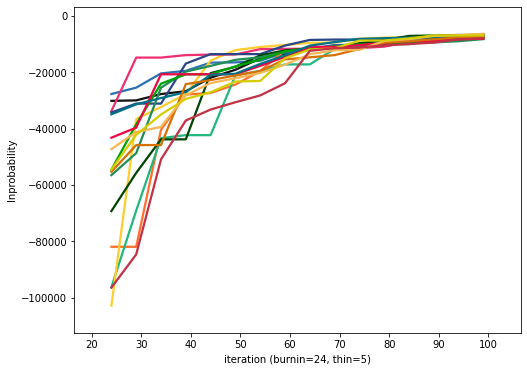

(<autofig.figure.Figure | 1 axes | 16 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [15]:
b.plot(solution='round_1', style='lnprobability', show=True)

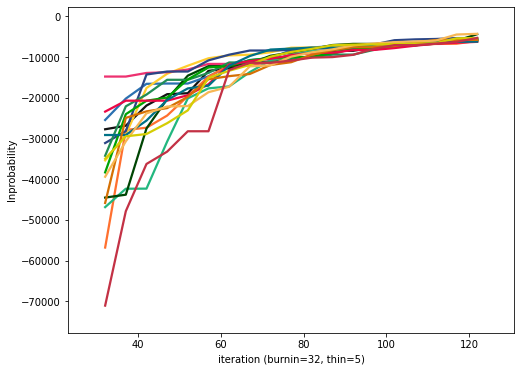

(<autofig.figure.Figure | 1 axes | 16 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [16]:
b.plot(solution='round_2', style='lnprobability', show=True)

In [17]:
print(b['burnin'])

ParameterSet: 2 parameters
          burnin@round_1@solution: 24
          burnin@round_2@solution: 32


In [18]:
from phoebe.dependencies import crimpl

In [19]:
s = crimpl.RemoteSlurmServer(host='terra')
print(s)

<RemoteSlurmServer host=terra directory=~/crimpl>


In [20]:
s.install_conda()

# crimpl: ssh terra "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"


In [21]:
s.save('terra', overwrite=True)

'/home/andrej/.crimpl/servers/terra.json'

In [22]:
b.add_server('remoteslurm', crimpl_name='terra', conda_env='workshop', nprocs=96, server='terra')

<ParameterSet: 11 parameters | qualifiers: conda_env, nprocs, isolate_env, use_mpi, mail_user, crimpl_name, slurm_job_name, install_deps, use_conda, mail_type, walltime>

In [23]:
print(b['terra@server'])

ParameterSet: 10 parameters
         crimpl_name@terra@server: terra
           use_conda@terra@server: True
           conda_env@terra@server: workshop
         isolate_env@terra@server: False
              nprocs@terra@server: 96
             use_mpi@terra@server: True
        install_deps@terra@server: True
      slurm_job_name@terra@server: 
            walltime@terra@server: 0.5 h
           mail_user@terra@server: 


In [24]:
b['use_server@dyn_rv'] = 'terra'
print(b['use_server@dyn_rv'])

Parameter: use_server@dyn_rv@compute
                       Qualifier: use_server
                     Description: Server to use when running the forward model (or "none" to run locally) via run_compute.
                           Value: terra
                         Choices: none, terra
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [25]:
print(b['continue_from@mcmc'])
b['continue_from@mcmc'] = 'round_2'
b['niters@mcmc@solver'] = 500

Parameter: continue_from@mcmc@solver
                       Qualifier: continue_from
                     Description: continue the MCMC run from an existing emcee solution.  Chains will be appended to existing chains (so it is safe to overwrite the existing solution).  If None, will start a new run using init_from.
                           Value: round_1
                         Choices: None, round_1, round_2
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [26]:
b.run_solver('mcmc', solution='round_3')

# crimpl: ssh terra "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p ~/crimpl"
# crimpl: scp crimpl_run_script.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; cd ~/crimpl; chmod +x ./crimpl_run_script.sh; ./crimpl_run_script.sh"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/andrej/crimpl/crimpl-job-2021.05.20-09.59.41/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2021.05.20-09.59.41/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
#

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: received ssh error, waiting 5s then retrying
# crimpl: ssh command succeeded
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "sque

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
#

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
#

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
#

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
#

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
#

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
#

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
#

# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "squeue -j 1526"
# crimpl: ssh terra "cat /home/users/andrej/crimpl/crimpl-job-2021.05.20-09.59.41/crimpl-job.status"
# crimpl: ssh terra "ls /home/users/andrej/crimpl/crimpl-job-2021.05.20-09.59.41/*"
# crimpl: ssh terra "ls /home/users/andrej/crimpl/crimpl-job-2021.05.20-09.59.41/*"
# crimpl: scp terra:/home/us

<ParameterSet: 21 parameters | qualifiers: fitted_units, burnin, failed_samples, fitted_uniqueids, adopt_values, lnprobabilities, thin, samples, adopt_distributions, progress, autocorr_times, comments, nwalkers, niters, wrap_central_values, distributions_bins, distributions_convert, adopt_parameters, lnprob_cutoff, acceptance_fractions, fitted_twigs>

In [27]:
b.save('./data/synthetic/after_terra.bundle')

'./data/synthetic/after_terra.bundle'

In [29]:
print(b.get_solution('round_3'))

ParameterSet: 21 parameters
R   detached_job@round_3@solution: loaded
   comments@mcmc@round_3@solution: 
R  wrap_central_values@round_3...: {'ByxjzcQpLyAKDbHYqUyvbnvvOCjoDX': 90.3431416538605}
R   fitted_twigs@round_3@solution: ['asini@binary@orbit@component' 'q@binary@orbit@component' 'vgamma@system'
 'ecc@binary@orbit@component' 'per0@binary@orbit@component']
R   fitted_units@round_3@solution: ['solRad' '' 'km / s' '' 'deg']
   adopt_parameters@round_3@so...: ['asini@binary@orbit@component', 'q@binary@orbit@component', 'vgamma@system', 'ecc@binary@orbit@component', 'per0@binary@orbit@component']
   adopt_distributions@round_3...: True
   distributions_convert@round...: mvsamples
    adopt_values@round_3@solution: True
R         niters@round_3@solution: 625
R       nwalkers@round_3@solution: 16
R        samples@round_3@solution: [[[8.00450682e+00 6.46755112e-01 2.56302909e+01 5.46356083e-02
   9.10206106e+01]
  [7.21705472e+00 9.43370683e-01 2.76283266e+01 1.94323555e-02
   9.1462333

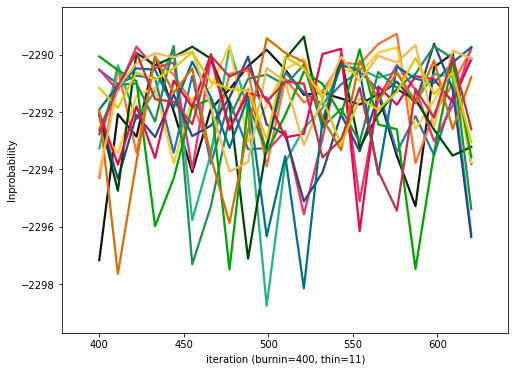

(<autofig.figure.Figure | 1 axes | 16 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [32]:
b.plot(solution='round_3', style='lnprobability', burnin=400, show=True)

(None, <Figure size 849.6x849.6 with 25 Axes>)

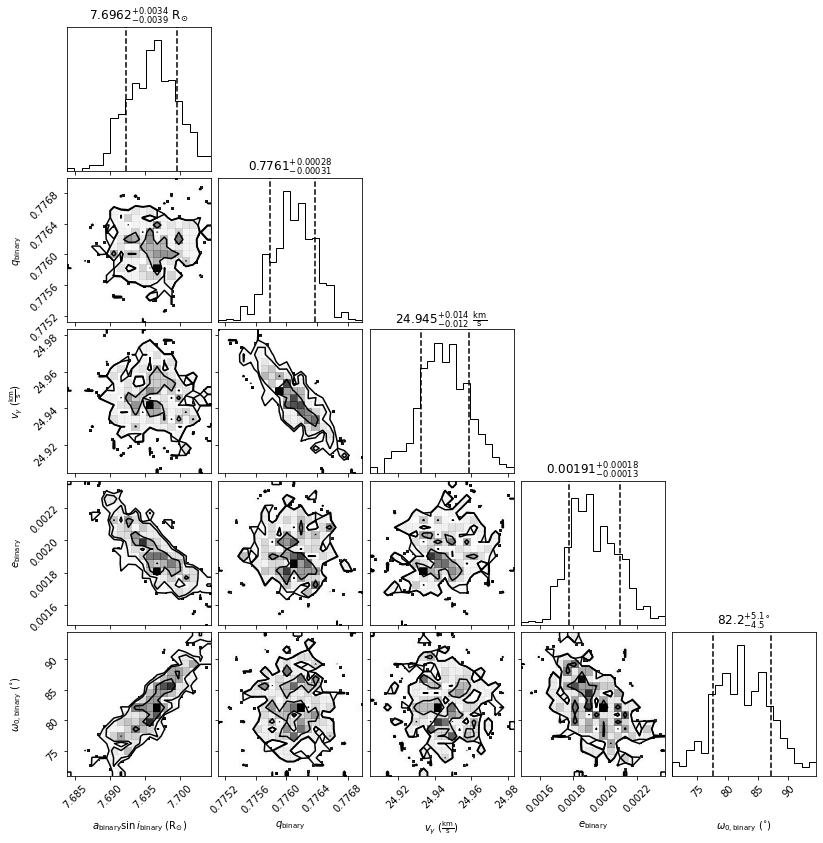

In [33]:
b.plot(solution='round_3', style='corner', burnin=400, show=True)

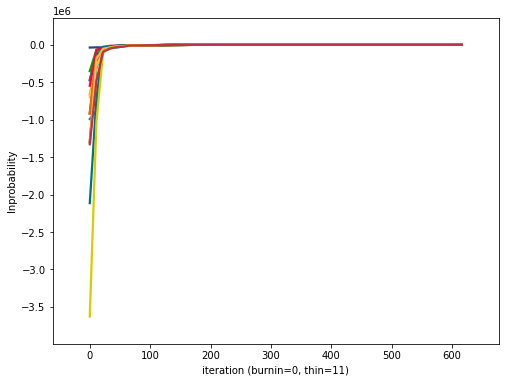

(<autofig.figure.Figure | 1 axes | 16 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [34]:
b.plot(solution='round_3', style='lnprobability', burnin=0, show=True)

So how do we know when to stop? Is it converged yet?

In [41]:
def acf(ts, lags=0, submean=False, normed=True, p=0.05, bartlett=True):
    lags = len(ts) if lags==0 else lags
    c0 = np.sum((ts-ts.mean())**2)/len(ts) if normed else 1.0
    if submean:
        acf = np.array([np.sum((ts[k:]-ts[k:].mean())*(ts[:len(ts)-k]-ts[:len(ts)-k].mean()))/c0/len(ts) for k in range(lags)])
    else:
        acf = np.array([np.sum((ts[k:]-ts.mean())*(ts[:len(ts)-k]-ts.mean()))/c0/len(ts) for k in range(lags)])
    
    if bartlett:
        vacf = np.ones_like(acf)/len(ts)
        vacf[0] = 0
        vacf[1] = 1/len(ts)
        vacf[2:] *= 1+2*np.cumsum(acf[1:-1]**2)
        ci = norm.ppf(1-p/2) * np.sqrt(vacf)
#         ci = np.array(list(zip(acf-ci, acf+ci)))
    else:
        ci = np.sqrt(2)*erfinv(1-p)/np.sqrt(len(ts))
    
    return acf, ci

In [74]:
w1 = b['value@lnprobabilities@round_3'][b['value@burnin@round_3']:,0]

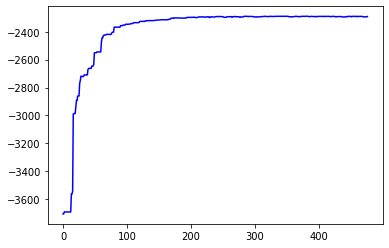

In [75]:
plt.plot(w1, 'b-')

In [76]:
acf_w1, acf_w1_ci = acf(w1, lags=65, normed=True)

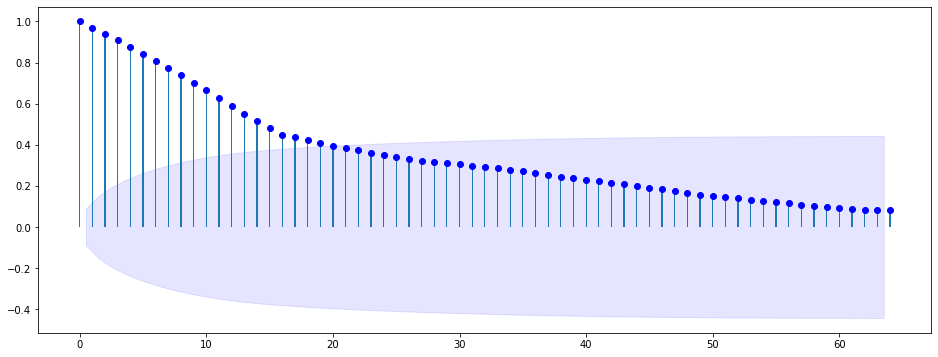

In [77]:
plt.figure(figsize=(16,6))
plt.bar(x=range(len(acf_w1)), height=acf_w1, width=0.1)
plt.plot(range(len(acf_w1)), acf_w1, 'bo')
plt.fill_between(np.arange(1, len(acf_w1_ci))-0.5, -acf_w1_ci[1:], acf_w1_ci[1:], color='b', alpha=0.1)
# xlim = plt.gca().get_xlim()
# plt.hlines([-acf_w1_ci, acf_w1_ci], xmin=xlim[0], xmax=xlim[1], color='g', linestyles='--')
# plt.xlim(xlim[0], xlim[1])

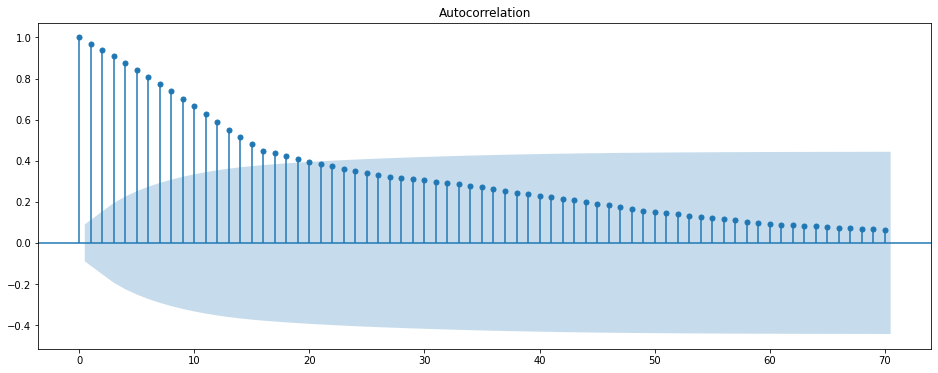

In [78]:
import statsmodels as sm
from statsmodels.graphics import tsaplots
plt.figure(figsize=(16,6))
ax = plt.gca()
_ = tsaplots.plot_acf(w1, lags=70, ax=ax)

In [79]:
acfs = [acf(b['value@lnprobabilities@round_3'][400:,k], lags=100, normed=True) for k in range(16)]

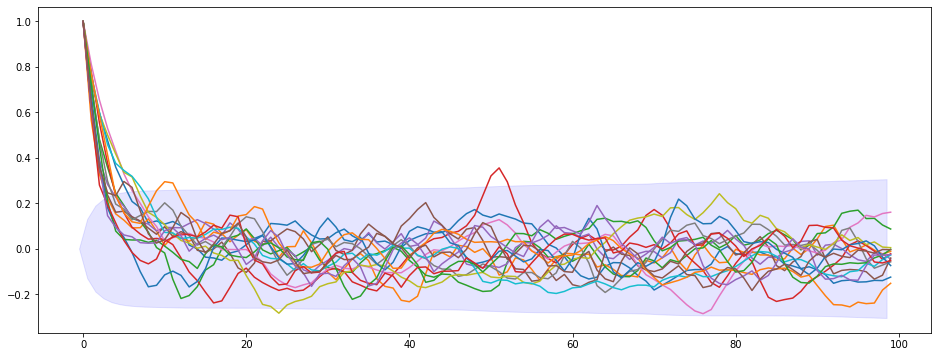

In [80]:
plt.figure(figsize=(16,6))
for k in range(16):
    plt.plot(acfs[k][0], '-')
plt.fill_between(np.arange(len(acfs[0][1]))-0.5, -acfs[0][1], acfs[0][1], color='b', alpha=0.1)
#     plt.axhline(-acfs[k][1], c='g', ls='--')
#     plt.axhline(acfs[k][1], c='g', ls='--')

Now let's try the parameters!

In [203]:
b['value@samples@round_3'].shape

(625, 16, 5)

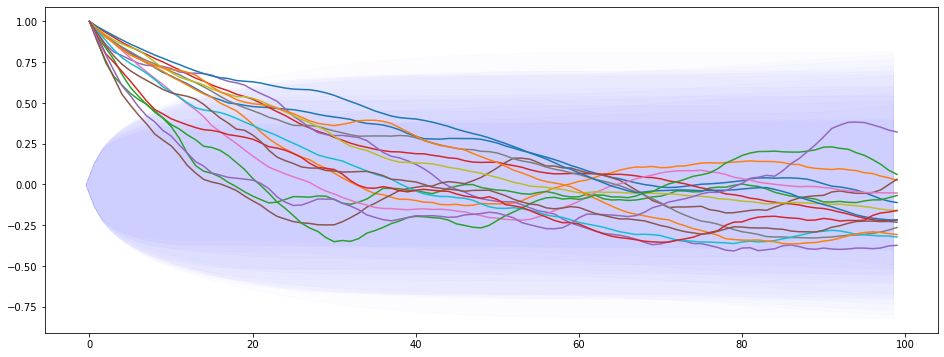

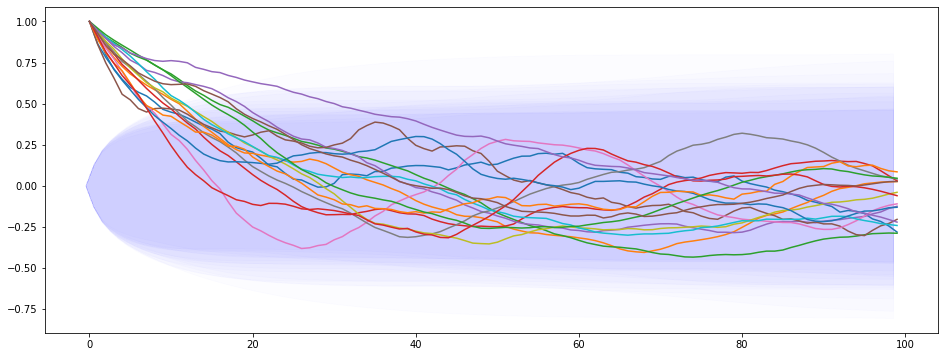

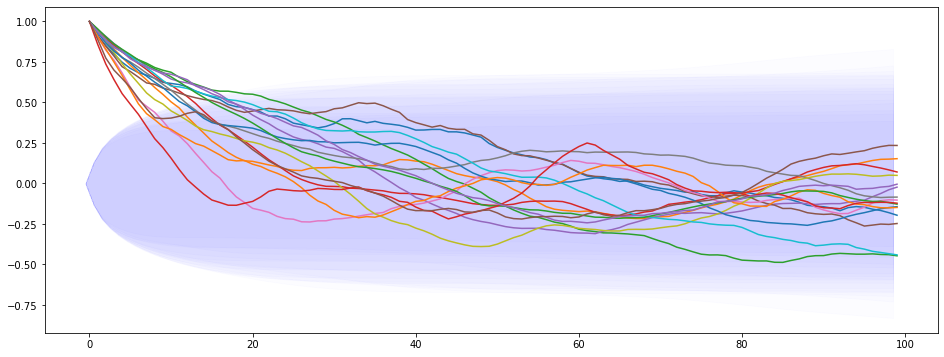

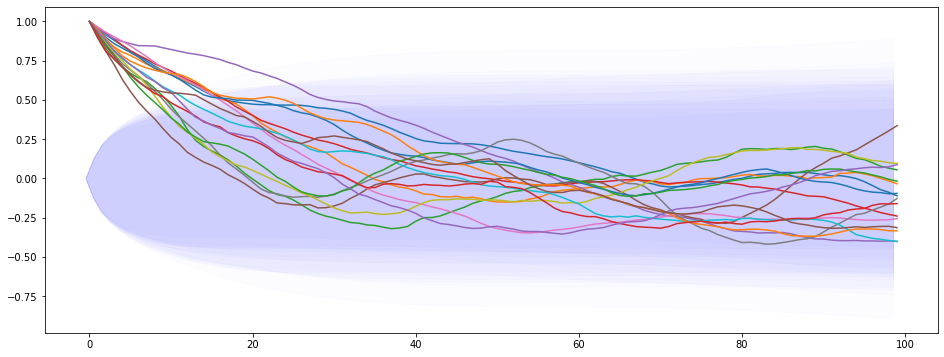

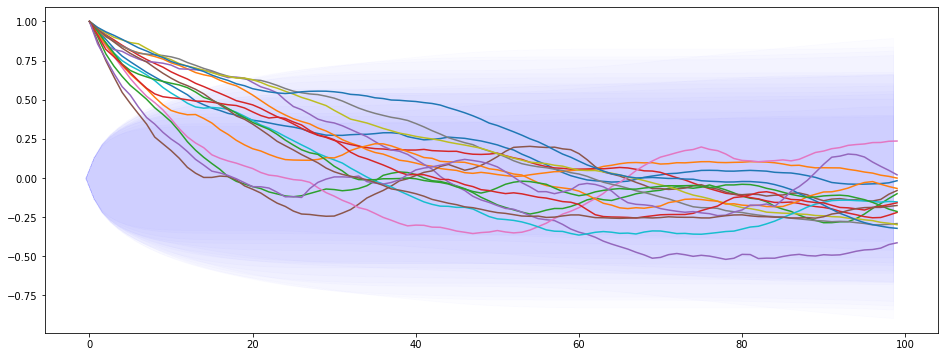

In [73]:
for i in range(5):
    acfs = [acf(b['value@samples@round_3'][400:,k,i], lags=100, normed=True) for k in range(16)]
    plt.figure(figsize=(16,6))
    for k in range(16):
        plt.plot(acfs[k][0], '-')
        plt.fill_between(np.arange(len(acfs[k][1]))-0.5, -acfs[k][1], acfs[k][1], color='b', alpha=0.01)

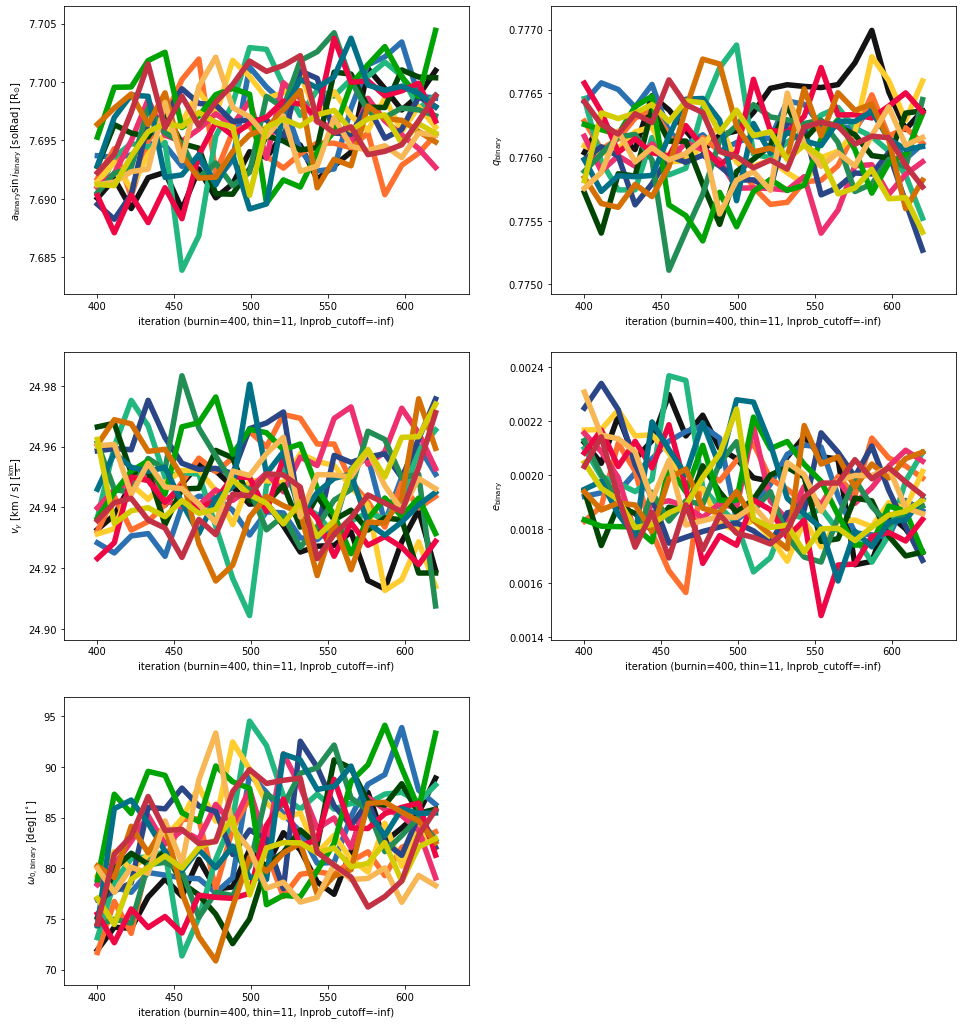

(<autofig.figure.Figure | 5 axes | 80 call(s)>,
 <Figure size 1152x1296 with 5 Axes>)

In [211]:
b.plot(solution='round_3', style='trace', burnin=400, show=True)

A-ha! So we're not converged yet! Let's do another round on terra!

In [212]:
b['continue_from@mcmc'] = 'round_3'

In [215]:
b.run_solver('mcmc', solution='round_4')

# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p ~/crimpl"
# crimpl: scp crimpl_run_script.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; cd ~/crimpl; chmod +x ./crimpl_run_script.sh; ./crimpl_run_script.sh"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/andrej/crimpl/crimpl-job-2021.05.24-11.15.42/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2021.05.24-11.15.42/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/andrej/crimpl/crimpl-job-2021.05.24-11.15.42"
# crimpl: scp crimpl_submit

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
# crimpl: ssh terra "squeue -j 1529"
#

<ParameterSet: 21 parameters | qualifiers: fitted_units, burnin, failed_samples, fitted_uniqueids, adopt_values, lnprobabilities, thin, samples, adopt_distributions, progress, autocorr_times, comments, nwalkers, niters, wrap_central_values, distributions_bins, distributions_convert, adopt_parameters, lnprob_cutoff, acceptance_fractions, fitted_twigs>

In [15]:
b.save('./data/synthetic/after_terra_2.bundle')

'./data/synthetic/after_terra_2.bundle'

(None, <Figure size 849.6x849.6 with 25 Axes>)

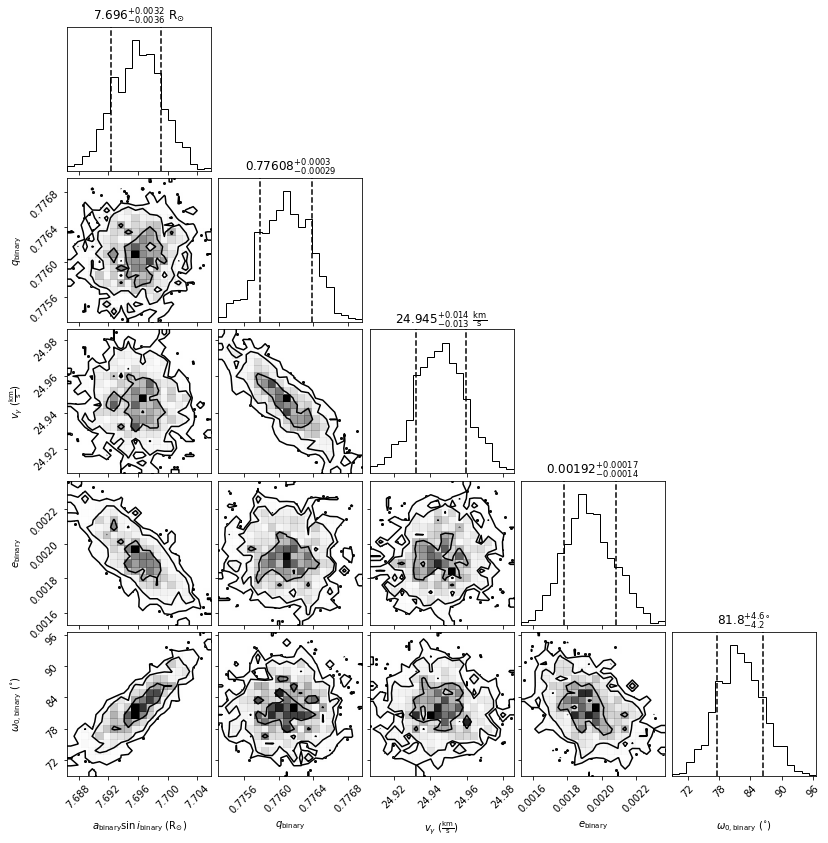

In [218]:
b.plot(solution='round_4', style='corner', burnin=400, show=True)

In [219]:
acfs = [acf(b['value@lnprobabilities@round_4'][400:,k], lags=100, normed=True) for k in range(16)]

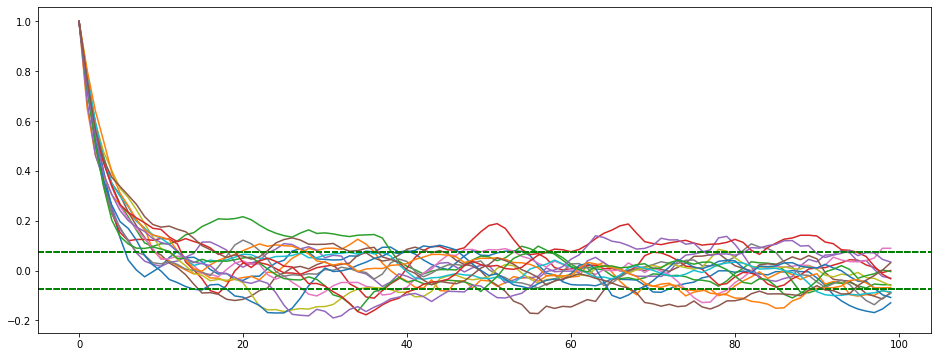

In [220]:
plt.figure(figsize=(16,6))
for k in range(16):
    plt.plot(acfs[k][0], '-')
    plt.axhline(-acfs[k][1], c='g', ls='--')
    plt.axhline(acfs[k][1], c='g', ls='--')

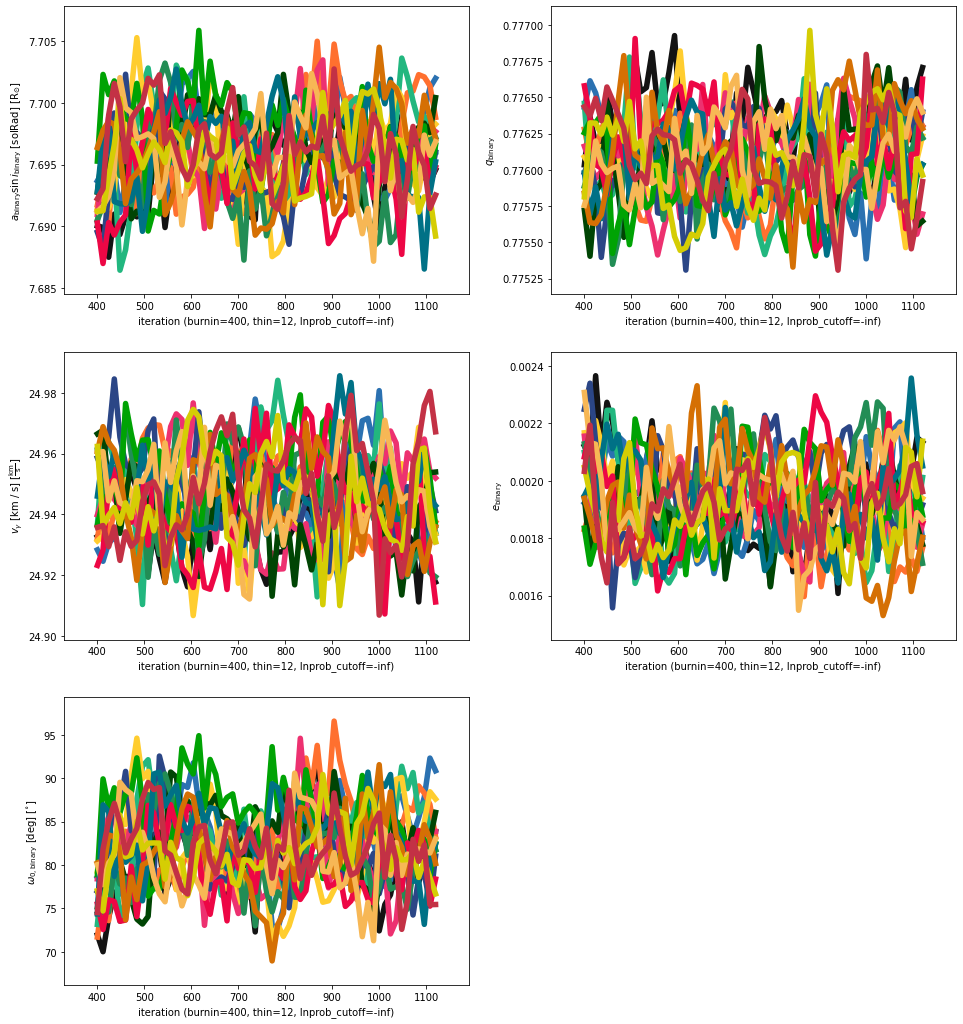

(<autofig.figure.Figure | 5 axes | 80 call(s)>,
 <Figure size 1152x1296 with 5 Axes>)

In [222]:
b.plot(solution='round_4', style='trace', burnin=400, show=True)

In [2]:
b = phoebe.load('./data/synthetic/after_terra_2.bundle')

/usr/local/lib/python3.9/dist-packages/phoebe/parameters/parameters.py:10312: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._value = np.array(value)


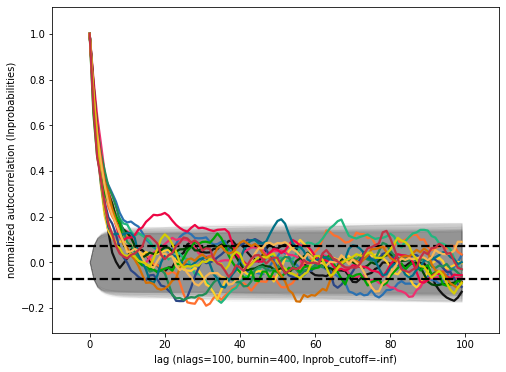

(<autofig.figure.Figure | 1 axes | 34 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [3]:
b.plot(solution='round_4', style='acf_lnprobabilities', nlags=100, burnin=400, show=True)

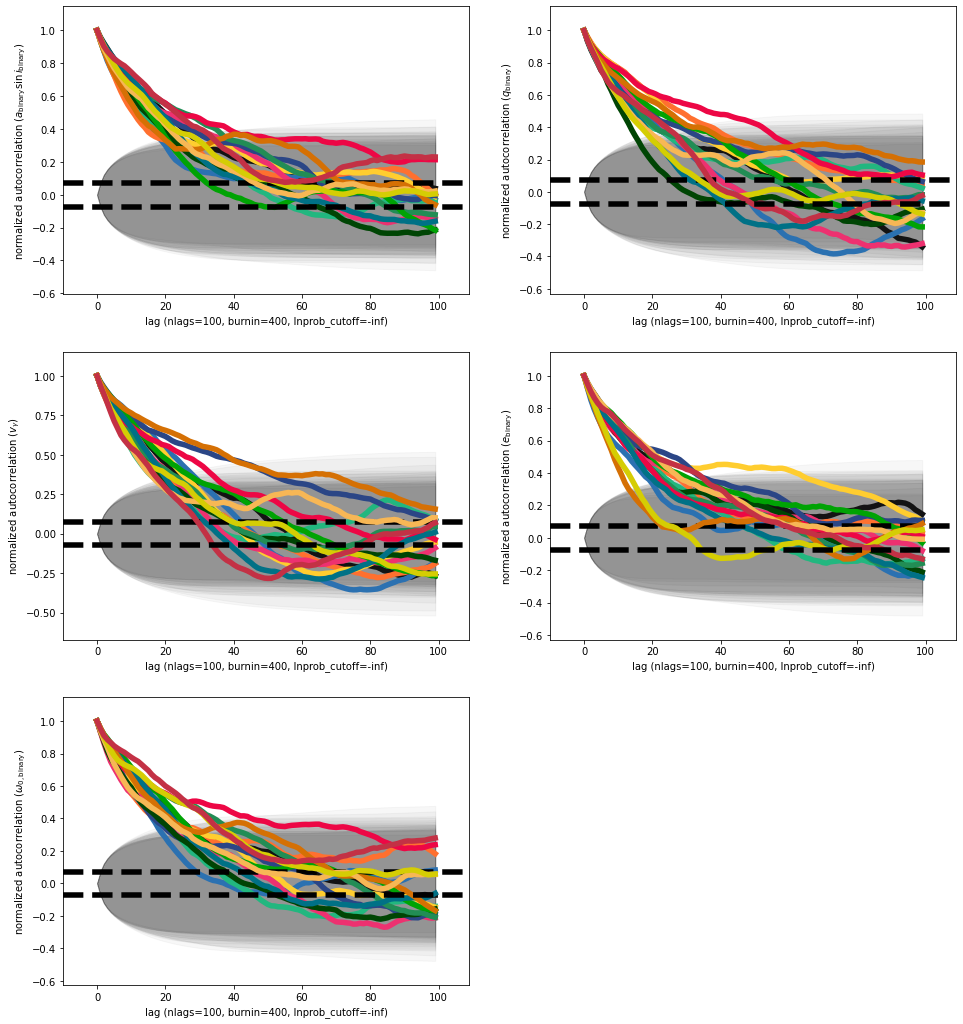

(<autofig.figure.Figure | 5 axes | 170 call(s)>,
 <Figure size 1152x1296 with 5 Axes>)

In [4]:
b.plot(solution='round_4', style='acf', nlags=100, burnin=400, show=True)

In [3]:
print(b['terra'])

ParameterSet: 12 parameters
R   detached_job@round_3@solution: unknown
R   detached_job@round_4@solution: unknown
         crimpl_name@terra@server: terra
           use_conda@terra@server: True
           conda_env@terra@server: workshop
         isolate_env@terra@server: False
              nprocs@terra@server: 96
             use_mpi@terra@server: True
        install_deps@terra@server: True
      slurm_job_name@terra@server: 
            walltime@terra@server: 48.0 h
           mail_user@terra@server: 


In [4]:
b.run_solver('mcmc',
             solution='final_round',
             continue_from='round_4',
             niters=1500,
             use_server='terra',
             progress_every_niters=100, 
             nprocs=384,
             walltime=(48,'hr'),
             detach=True)

# crimpl: ssh terra "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p ~/crimpl"
# crimpl: scp crimpl_run_script.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; cd ~/crimpl; chmod +x ./crimpl_run_script.sh; ./crimpl_run_script.sh"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/andrej/crimpl/crimpl-job-2021.05.29-22.03.02/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2021.05.29-22.03.02/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

In [14]:
print(b.get_solution('final_round'))

ParameterSet: 2 parameters
R  detached_job@final_round@so...: unknown
    comments@final_round@solution: 
